In [1]:
import pyscf
from pyscf import gto, dft, cc, scf, fci
import numpy as np
import matplotlib.pyplot as plt

/depot/awasser/apps/psi4_1.8_pyscf_2.3.0/lib/python3.8/site-packages/pyscf/dft/libxc.py:772: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, the same to the B3LYP functional in Gaussian and ORCA (issue 1480). To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


### Work flow

Currently I work almost entirely on RCAC's bell node, using jupyter notebook for simple jobs, or submitting jobs via SLURM for more demanding jobs. This is easily accessible through your browser (https://gateway.bell.rcac.purdue.edu/pun/sys/dashboard), through ssh from your local machine, or the remote terminal also available on the bell gateway.

### References for electronic structure and pyscf

Dr. Slipchenko's chm673 github page with slides based on the blue book (szabo) <br>
(an introduction to electronic structure calculations at large, unforunately does not cover DFT) <br>
https://github.com/slipchenko/CHM673?tab=readme-ov-file <br>

for HF/SCF scheme: <br>
https://insilicosci.com/hartree-fock-method-a-simple-explanation/ <br>

For DFT, Either ABC's of DFT or Adam's notes: <br>
(has helpful dictionary pg 9) <br>
https://dft.uci.edu/doc/g1.pdf  <br>

PYSCF documentation<br>
(is spread out between the next 3 links, topmost easiest to understand, source code hardest but most direct)<br>
https://pyscf.org/user.html<br>
https://pyscf.org/pyscf_api_docs/pyscf.dft.html<br>

PYSCF source code:<br>
https://github.com/pyscf/pyscf/blob/master/pyscf/dft/rks.py<br>

PYSCF examples github page<br>
(sometimes helpful examples for problems you might come across)<br>
https://github.com/pyscf/pyscf/tree/master/examples<br>

While written for PSI4, these tutorials are still very good<br>
(for psi4, but very thorough and well done tutorials)<br>
https://github.com/psi4/psi4numpy/tree/master/Tutorials<br>

### Pyscf

pyscf is an electronic strucutre package in Python. pyscf is quite similiar to Psi4 in a lot of ways. Here is how the calculation for a simple molecule might look in pyscf

In [2]:
#set up the geometry of your molecule, there are various formats you can use, here I used a Z-matrix
h2 = gto.M(atom =f"""
    H
    H 1 0.74
""", basis = 'cc-pvdz', spin=0)
# There are more options, but here we specify the basis and the spin(2S, or alpha - beta)

In [3]:
#lets start with a restricted hartree fock calculation
myhf = scf.RHF(h2)
#then kernel() does the calculation
myhf.kernel()

converged SCF energy = -1.12870009355644


-1.1287000935564406

In [4]:
# the energy can either be written to a variable directly, or accessed later on via:
energy_hf = myhf.kernel()
print(energy_hf)
print(myhf.e_tot)

converged SCF energy = -1.12870009355644
-1.1287000935564406
-1.1287000935564406


In [5]:
# for some challenging structures, it is also a good idea to check if the solution is stable, that is, can a small change bring us lower in energy?
# internal = within our constraints on the wf
# external = breaking our constraints on the wf
# if the solution is hard to converge/unstable you can try a second order convergence method, such as newton() in pyscf

In [6]:
myhf.stability()

<class 'pyscf.scf.hf.RHF'> wavefunction is stable in the internal stability analysis


(array([[ 4.03664765e-01, -1.50244032e-01, -7.00107677e-01,
         -7.60674244e-01,  2.40616190e-18, -1.36829553e-16,
         -4.43728072e-01, -1.88263747e-17,  8.07638220e-16,
          2.68617997e+00],
        [ 1.73762870e-01, -1.95865624e+00,  7.26372802e-01,
          1.61734280e+00, -7.91626372e-16, -2.23379778e-16,
          2.21064673e-01,  1.37188203e-16, -6.93999281e-16,
          5.05843355e-02],
        [ 2.24974536e-02, -1.42535410e-02, -1.12663025e-02,
          4.10218210e-01,  9.99687175e-17,  8.40587271e-17,
          7.26901334e-01, -3.74261988e-17, -1.31765810e-15,
          2.02675347e+00],
        [-1.28334802e-17, -9.25829683e-17, -1.00355606e-16,
          2.78583291e-16,  5.32147154e-01,  2.28279751e-01,
          1.51297282e-15, -9.67274286e-02,  9.86619772e-01,
         -3.14595112e-17],
        [ 2.89632829e-18,  4.74260549e-17, -8.55523208e-17,
          4.22106790e-17, -2.28279751e-01,  5.32147154e-01,
          2.14919546e-16,  9.86619772e-01,  9.672742

In [7]:
#once you have run the calculation, you can easily make your 1-particle reduced density matrix

In [8]:
Dhf = myhf.make_rdm1()

In [9]:
#it is important to note whether the rdm is on the atomic or molecular orbitals, which is usaully in the documentation, or you can check using the overlap matrix, S

In [10]:
S = h2.intor("int1e_ovlp")
print(np.sum(Dhf*S))
# which should return the # of electrons

1.9999999999999993


In [11]:
# for very small number of electrons we can do FCI calcultions directly in jupyter, for larger systems we want to submit jobs
# however, FCI scales incredibly poorly meaning anything with more than ~10 electrons is inaccessible in a reasonable basis set
# recall that FCI requires a previous calculation to generate the orbitals
myfci = pyscf.fci.FCI(myhf)
myfci.kernel()
Dfci = myfci.make_rdm1(myfci.ci, myfci.norb, myfci.nelec)
print(myfci.e_tot)

-1.1633744903192411


In [12]:
# check job_example/ for an example how how to submit jobs to SLURM

### DFT calculation in pyscf
performing a dft calculation is very similiar to HF

In [13]:
# first you need your geometry
h2 = gto.M(atom =f"""
    H
    H 1 0.74
""", basis = 'cc-pvdz', spin=0)

In [14]:
#then we setup our restricted Kohn-Sham DFT calculation
mypbe=dft.RKS(h2)
mypbe.verbose = 9  #1-9 how much output?
#for DFT, we need to additionally specify which XC functional we wish to use
mypbe.xc = 'pbe' # = 'pbe,pbe'
#mypbe.xc = ',pbe' only pbe correlation
#mypbe.xc = 'pbe,' only pbe exchange
#then we use kernel() to execute the calculation
mypbe.kernel()



******** <class 'pyscf.dft.rks.RKS'> ********
method = RKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmp2is0ypgm
max_memory 4000 MB (current use 145 MB)
XC library pyscf.dft.libxc version 6.1.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = pbe
    J. P. Perdew, K. Burke, and M. Ernzerhof.,  Phys. Rev. Lett. 77, 3865 (1996)
    J. P. Perdew, K. Burke, and M. Ernzerhof.,  Phys. Rev. Lett. 78, 1396 (1997)
    J. P. Perdew, K. Burke, and M. Ernzerhof.,  Phys. Rev. Lett. 77, 3865 (1996)
    J. P. Perdew, K. Burke, and M. Ernzerhof.,  Phys. Rev. Lett. 78, 1396 (1997)
small_rho_cutoff = 1e-07
Set gradient conv threshold to 3.16228e-05
Initial guess from minao.
Nelec from initial guess = 1.998

-1.159847080342276

In [15]:
#similiar to HF, we can access the energy:
print(mypbe.e_tot)

-1.159847080342276


In [16]:
#we could also have used a different functional, a list of aliases for common functionals
# can be found here (assuming you use the defualt libxc) https://github.com/pyscf/pyscf/blob/master/pyscf/dft/libxc.py
mylda=dft.RKS(h2)
mylda.xc = 'lda'
mylda.kernel()

converged SCF energy = -1.03722545361317


-1.0372254536131713

In [17]:
# it can also be useful to extract the energy components of the DFT energy
# recall E_ks = Ts + E_ext + E_J + E_xc (11.10)
# and to get the total energy, we add the electric to the nuclear replusion energy
# in pyscf, hcore contains both the Ts and E_ext terms
# many quantities are easily acessible:

# Total energy
print(f"Total energy: {mypbe.e_tot} Hartree")

mypbe.verbose = 0
# get_veff calculates columb energy (J) + XC, and each part is accessbile with .ecoul or .exc
# Coulomb energy (Hartree energy)
print(f"Coulomb energy: {mypbe.get_veff().ecoul} Hartree")
# Exchange-correlation energy
print(f"Exchange-correlation energy: {mypbe.get_veff().exc} Hartree")

# Nuclear repulsion energy
print(f"Nuclear repulsion energy: {mypbe.energy_nuc()} Hartree")

# note we can also access the electronic energy with energy_elec(), which returns: (electronic energy, 2electron contribution)
print(f"Electronic energy: {mypbe.energy_elec()[0]} Hartree")


Total energy: -1.159847080342276 Hartree
Coulomb energy: 1.3178860941090915 Hartree
Exchange-correlation energy: -0.6902759427948173 Hartree
Nuclear repulsion energy: 0.7151043390810812 Hartree
Electronic energy: -1.8749514194233572 Hartree


In [18]:
# Lastly we need Ts and E_ext, these can be accesed simultaneously within hcore
# We can also analytically find Ts:
# https://pyscf.org/user/dft.html#numerical-integration-grids
#t_s = 0.5 sum_occ ( | nabla phi_i |^2 ) kinetic energy density
#T_s = int (ts) dr Kinetic Energy
occ_orbs = mypbe.mo_coeff[:, mypbe.mo_occ > 0.]
Ts_ao = h2.intor('int1e_kin') # pyscf has a supported list of AO integrals, this is 1e kinetic
Ts_analyt = np.einsum('ui,uv,vi->', occ_orbs, Ts_ao, occ_orbs)
print(Ts_analyt)

0.5501353647823175


In [19]:
# as aforementioned we can access Ts and E_ext using hcore:
# finding <phi|Hcore|phi> using density matrix (on AO)
h1e = mypbe.get_hcore()
dm = mypbe.make_rdm1()
e1 = np.einsum('ij,ji->', h1e, dm)
print(e1)

-2.5025615707376314


In [20]:
# this will give us the total electronic energy
print(e1+mypbe.get_veff().ecoul+mypbe.get_veff().exc)

-1.8749514194233572


In [21]:
#if we add the nuclear energy does it match the energy from before?
print(e1+mypbe.get_veff().ecoul+mypbe.get_veff().exc + mypbe.energy_nuc())
print(mypbe.e_tot)

-1.159847080342276
-1.159847080342276


In [22]:
#E_ext
e1-Ts_analyt

-3.0526969355199487

In [23]:
# we can also seperate out the effects of Exchange and Correlation:
# we do this by using the density matrix we made for h2 using PBE XC
# and then compute the exc from get_veff using either only Exchange or only correlation PBE

In [24]:
# define mypbe_x.xc to only have exchange part of pbe
mypbe_x=dft.RKS(h2)
mypbe_x.xc = 'pbe,'

In [25]:
# define mypbe_x.xc to only have correlation part of pbe
mypbe_c=dft.RKS(h2)
mypbe_c.xc = ',pbe'

In [26]:
#get_veff computes J+xc, but here we have only defined J+x
# moreover, we are not interested in J, so we grab only the .exc component:
ex=dft.rks.get_veff(mypbe_x, dm=dm).exc
print(ex)

-0.6452051510383275


In [27]:
#likewise for Correlation
ec=dft.rks.get_veff(mypbe_c, dm=dm).exc
print(ec)

-0.045070791756299425


In [28]:
ex+ec

-0.690275942794627

In [29]:
#compare with both X and C:
(ex+ec)-dft.rks.get_veff(mypbe, dm=dm).exc
#pretty close!

1.9029222642075183e-13

### Plotting V_xc

#### slice

converged SCF energy = -1.13141128366178


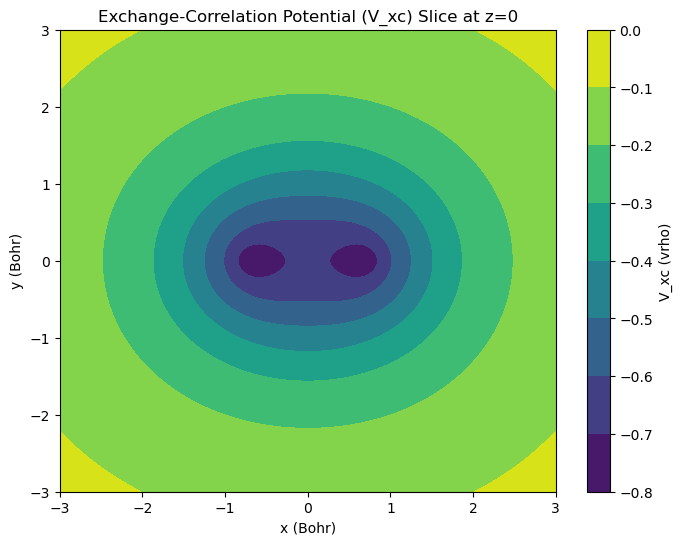

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, dft
from pyscf.dft import numint

# set up the geometry and DFT calculation
mol = gto.M(atom =f"""
    H -0.37 0 0
    H  0.37 0 0
""", basis = 'cc-pvdz', spin=0)

mf = dft.RKS(mol)
mf.kernel()
dm = mf.make_rdm1()

# Create a square grid on the xy-plane with z = 0
grid_size = 200
x = np.linspace(-3, 3, grid_size)
y = np.linspace(-3, 3, grid_size)
xv, yv = np.meshgrid(x, y)
#mesh grid takes the axes we made and populates them with coordinates to form a grid plane
coords_grid = np.array([xv.ravel(), yv.ravel(), np.zeros(grid_size * grid_size)]).T

# Evaluate AO values on this grid
ao_value_grid = numint.eval_ao(mol, coords_grid, deriv=1)
# Compute the density on this grid
rho_grid = numint.eval_rho(mol, ao_value_grid, dm, xctype='GGA')

# Compute exchange-correlation potential on this grid
exc_grid, vxc_grid = dft.libxc.eval_xc('pbe', rho_grid)[:2]
vrho_grid = vxc_grid[0]

# Reshape the data for plotting
vrho_grid_reshaped = vrho_grid.reshape((grid_size, grid_size))

# Plot V_xc on the custom grid
plt.figure(figsize=(8, 6))
plt.contourf(xv, yv, vrho_grid_reshaped, cmap='viridis')
plt.colorbar(label='V_xc (vrho)')
plt.xlabel('x (Bohr)')
plt.ylabel('y (Bohr)')
plt.title('Exchange-Correlation Potential (V_xc) Slice at z=0')
plt.show()


#### projection

converged SCF energy = -1.13141128366178


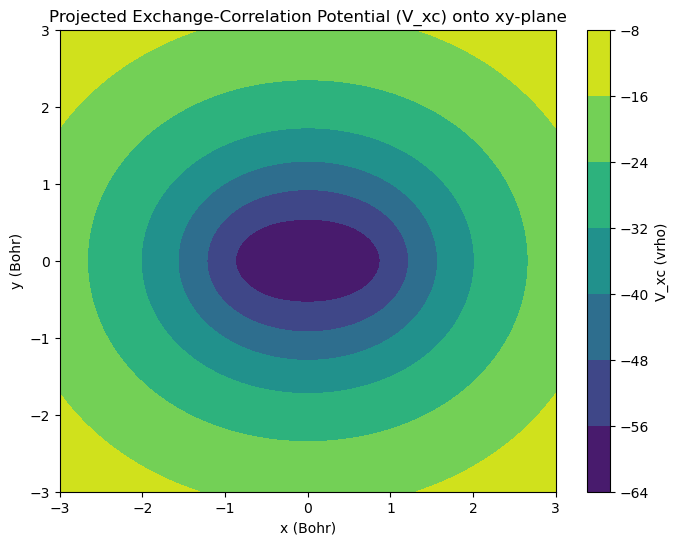

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, dft
from pyscf.dft import numint

# Set up molecule and DFT calculation
mol = gto.M(atom =f"""
    H -0.37 0 0
    H  0.37 0 0
""", basis = 'cc-pvdz', spin=0)

mf = dft.RKS(mol)
mf.kernel()
dm = mf.make_rdm1()

# Create a 3D grid
grid_size = 170
x = np.linspace(-3, 3, grid_size)
y = np.linspace(-3, 3, grid_size)
z = np.linspace(-3, 3, grid_size)
xv, yv, zv = np.meshgrid(x, y, z, indexing='ij')  # Use 'ij' indexing for consistent mesh

coords_grid = np.array([xv.ravel(), yv.ravel(), zv.ravel()]).T

# Evaluate AO values on this grid
ao_value_grid = numint.eval_ao(mol, coords_grid, deriv=1)
# Compute the density on this grid
rho_grid = numint.eval_rho(mol, ao_value_grid, dm, xctype='GGA')

# Compute exchange-correlation potential on this grid
exc_grid, vxc_grid = dft.libxc.eval_xc('pbe', rho_grid)[:2]
vrho_grid = vxc_grid[0]

# Reshape vrho_grid to match the dimensions of coords_grid
vrho_grid_reshaped = vrho_grid.reshape((grid_size, grid_size, grid_size))

# Sum along the z-axis (axis=2) to project onto the xy-plane
vrho_projected = np.sum(vrho_grid_reshaped, axis=2)

# Plot projected V_xc on the xy-plane
plt.figure(figsize=(8, 6))
plt.contourf(xv[:, :, 0], yv[:, :, 0], vrho_projected, cmap='viridis')
plt.colorbar(label='V_xc (vrho)')
plt.xlabel('x (Bohr)')
plt.ylabel('y (Bohr)')
plt.title('Projected Exchange-Correlation Potential (V_xc) onto xy-plane')
plt.show()



In [15]:
# lets make sure that we are doing this correctly. here we try to sum up all the electorn density at each grid point cube , which 
# should equal the total number of electrons.
dx = x[1] - x[0]
dy = y[1] - y[0]
dz = z[1] - z[0]
dV = dx * dy * dz

# Sum the electron density values and multiply by the volume element to get the total number of electrons
total_electrons = np.sum(rho_grid) * dV
print("Total number of electrons:", total_electrons)


Total number of electrons: 1.9673701103049523


## An example; dissociation of H2

In [32]:
# we want to solve a set of H2 geometries with varying distances

In [33]:
#generate a list of distances to calculate at
dists=np.linspace(0.4,6,20)
#create a list to store our energies at each angle
energies=[]

In [34]:
# now we need a loop to calcuate the energy of each geometry
for dist in dists:
    h2 = gto.M(atom =f"""
        H
        H 1 {dist}
    """, basis = 'cc-pvdz', spin=0)
    
    mypbe=dft.RKS(h2)
    mypbe.verbose = 3  #1-9
    mypbe.xc = 'pbe' # = 'pbe,pbe'
    # do the calcualtion and write the energy into 'energy'
    energy = mypbe.kernel()
    #append the energy of this calculation to the list of energies
    energies.append(energy)
    

converged SCF energy = -0.937032916770662
converged SCF energy = -1.15636023776127
converged SCF energy = -1.14045881270506
converged SCF energy = -1.09178069795247
converged SCF energy = -1.04570901218892
converged SCF energy = -1.00866646614755
converged SCF energy = -0.98072029939252
converged SCF energy = -0.960339214944976
converged SCF energy = -0.945793372140735
converged SCF energy = -0.93556935387987
converged SCF energy = -0.928461781146619
converged SCF energy = -0.923573016129572
converged SCF energy = -0.920251798949372
converged SCF energy = -0.918025367812108
converged SCF energy = -0.916551958324946
converged SCF energy = -0.915500943303226
converged SCF energy = -0.914980160745176
converged SCF energy = -0.914599168567054
converged SCF energy = -0.914369878901053
converged SCF energy = -0.914236404504152


In [35]:
# now we want to graph the list of energies with its corresponding distance.

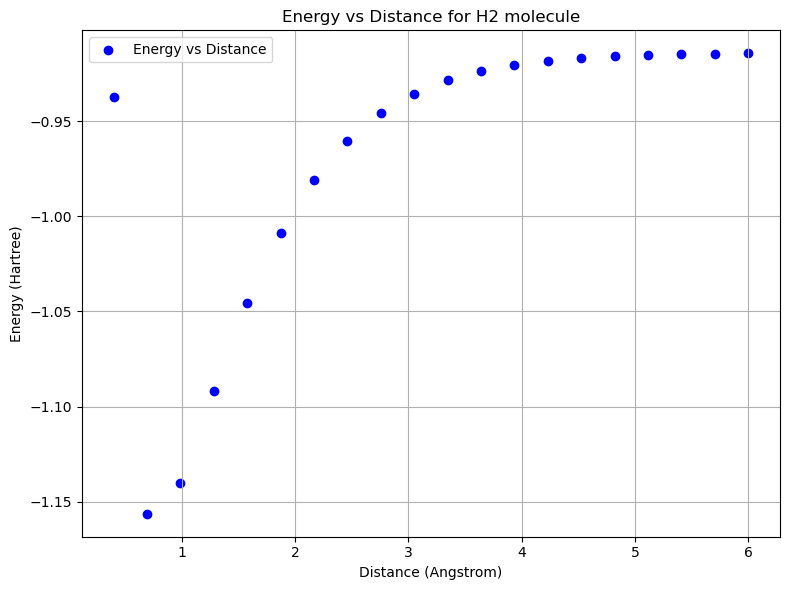

In [36]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(dists, energies, color='b', label='Energy vs Distance', marker='o')
plt.xlabel('Distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy vs Distance for H2 molecule')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()



In [37]:
# however, what we have computed here are absoulte energies, and we want some reference so we can compare energy differnces:
# here, we will use the energy of 2 seperate H atoms as the reference, this would be H2 stretched infintely

In [38]:
h = gto.M(atom =f"""
    H
""", basis = 'cc-pvdz', spin=1)

mypbe=dft.RKS(h)
mypbe.verbose = 3  #1-9
mypbe.xc = 'pbe' # = 'pbe,pbe'
E_h_pbe = mypbe.kernel()

converged SCF energy = -0.498628118400243


In [39]:
#now lets do the same calculation as before, but subtract 2*E_h_pbe from each energy 

converged SCF energy = -0.937032916770662
converged SCF energy = -1.13155517157006
converged SCF energy = -1.16023727367658
converged SCF energy = -1.14193501143512
converged SCF energy = -1.11075420612971
converged SCF energy = -1.07832318491113
converged SCF energy = -1.04861599689238
converged SCF energy = -1.02283412127681
converged SCF energy = -1.00113465637902
converged SCF energy = -0.983230173953262
converged SCF energy = -0.96865377971904
converged SCF energy = -0.956905082936502
converged SCF energy = -0.947511665967953
converged SCF energy = -0.940049215335157
converged SCF energy = -0.934150275812291
converged SCF energy = -0.929507466905022
converged SCF energy = -0.925869744708722
converged SCF energy = -0.92303399552134
converged SCF energy = -0.920835714052842
converged SCF energy = -0.919141379865802
converged SCF energy = -0.917842864481113
converged SCF energy = -0.91685313776189
converged SCF energy = -0.916100125621386
converged SCF energy = -0.915535321510427
con

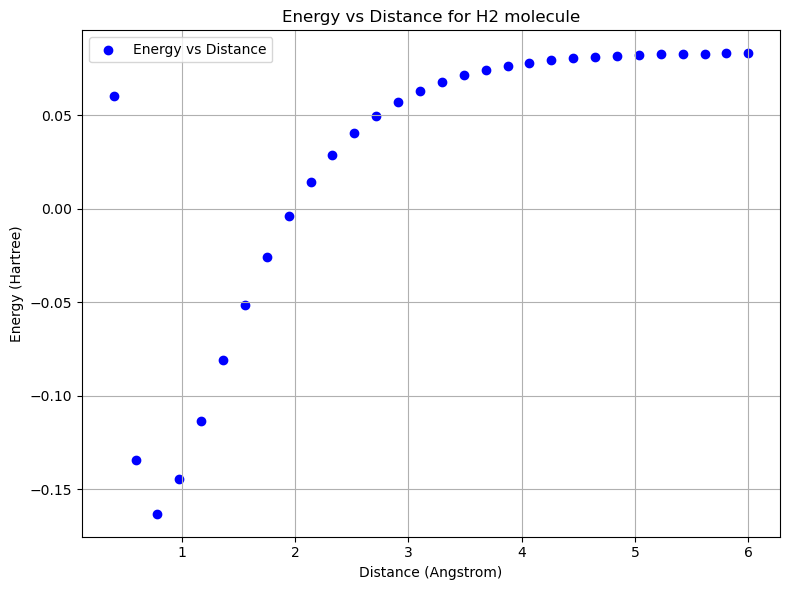

In [40]:
dists=np.linspace(0.4,6,30)
energies=[]

for dist in dists:
    h2 = gto.M(atom =f"""
        H
        H 1 {dist}
    """, basis = 'cc-pvdz', spin=0)
    
    mypbe=dft.RKS(h2)
    mypbe.verbose = 3  #1-9
    mypbe.xc = 'pbe' # = 'pbe,pbe'
    energy = mypbe.kernel()
    energies.append(energy - (2*E_h_pbe))
    
plt.figure(figsize=(8, 6))
plt.scatter(dists, energies, color='b', label='Energy vs Distance', marker='o')
plt.xlabel('Distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy vs Distance for H2 molecule')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

In [41]:
# The energy should converge to 0 at infinite distance, this isnt even close to happening with pbe!

converged SCF energy = -0.499278403419583
0.4
0.5931034482758621
0.7862068965517242
0.9793103448275863
1.1724137931034484
1.3655172413793104
1.5586206896551724
1.7517241379310344
1.9448275862068964
2.1379310344827585
2.3310344827586205
2.5241379310344825
2.717241379310345
2.910344827586207
3.103448275862069
3.296551724137931
3.489655172413793
3.682758620689655
3.875862068965517
4.068965517241379
4.2620689655172415
4.455172413793104
4.6482758620689655
4.841379310344828
5.03448275862069
5.227586206896552
5.420689655172414
5.613793103448276
5.806896551724138
6.0


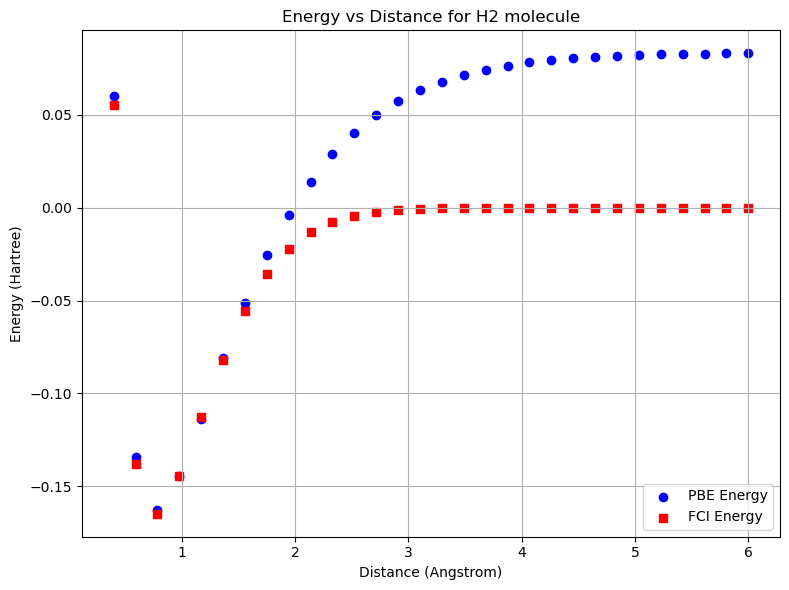

In [42]:
# lets add a FCI calculation and compare
dists=np.linspace(0.4,6,30)
energies_pbe=[]
energies_fci=[]

#find the reference H with fci
myhf=scf.RHF(h)
myhf.kernel()
myfci = pyscf.fci.FCI(myhf)
myfci.kernel()
E_h_fci= myfci.e_tot


for dist in dists:
    print(dist)
    h2 = gto.M(atom =f"""
        H
        H 1 {dist}
    """, basis = 'cc-pvdz', spin=0)
    
    mypbe=dft.RKS(h2)
    mypbe.verbose = 0  #1-9
    mypbe.xc = 'pbe' # = 'pbe,pbe'
    energy_pbe = mypbe.kernel()
    energies_pbe.append(energy_pbe - (2*E_h_pbe))
    
    myhf=scf.RHF(h2)
    myhf.verbose = 0
    myhf.kernel()
    myfci = pyscf.fci.FCI(myhf)
    myfci.verbose = 0
    myfci.kernel()
    energy_fci = myfci.e_tot
    energies_fci.append(energy_fci - (2*E_h_fci))
    
# Plotting
plt.figure(figsize=(8, 6))
# Plot PBE energies
plt.scatter(dists, energies_pbe, color='b', label='PBE Energy', marker='o')
# Plot FCI energies
plt.scatter(dists, energies_fci, color='r', label='FCI Energy', marker='s')

plt.xlabel('Distance (Angstrom)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy vs Distance for H2 molecule')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()

# Display the plot
plt.show()

In [43]:
# fci converges to 0 very quickly!

You can try and play around with different methods/functionals and see how they perform at recreating the FCI (exact) H2 dissociation curve